In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, train_test_split, KFold, cross_val_score

In [2]:
# Load Iris Dataset
df = datasets.load_iris()

In [3]:
# Instantiate a logistic regression model with max iterations equal to 1000
model = LogisticRegression(max_iter=1000)

In [6]:
# Instantiate KFold with 5 splits and train the model. 
kf = KFold(n_splits=5, shuffle=True, random_state=1)
# Use cross_val_score to measure the accuracy of the model.
scores = cross_val_score(model, df.data, df.target, cv=kf, scoring='accuracy')
# Print the average accuracy score  
print('Average accuracy score: {} mean accuracy score: {}'.format(scores.mean(), scores))

Average accuracy score: 0.96 mean accuracy score: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]


In [7]:
# Get the training and testing score using learning_curve with cv=5 and train_size= np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(model, df.data, df.target, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
# Caluclate the average score for training and testing 
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
print('Average training score: {} mean testing score: {}'.format(train_scores_mean, test_scores_mean))

Average training score: [       nan        nan        nan 1.         1.         1.
 0.97380952 0.98541667 0.96111111 0.975     ] mean testing score: [       nan        nan        nan 0.66       0.66666667 0.66666667
 0.8        0.94666667 0.96666667 0.97333333]


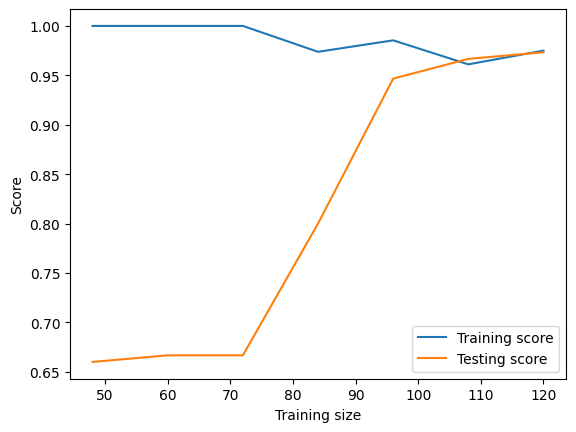

In [8]:
# Plot the learning curves 
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Testing score')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend()
plt.show()